# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#%matplotlib inline

In [2]:
# carregando a base de dados
df = pd.read_csv("SINASC_RO_2019.csv")

In [3]:
# checando as 5 primeiras linhas da base de dados
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

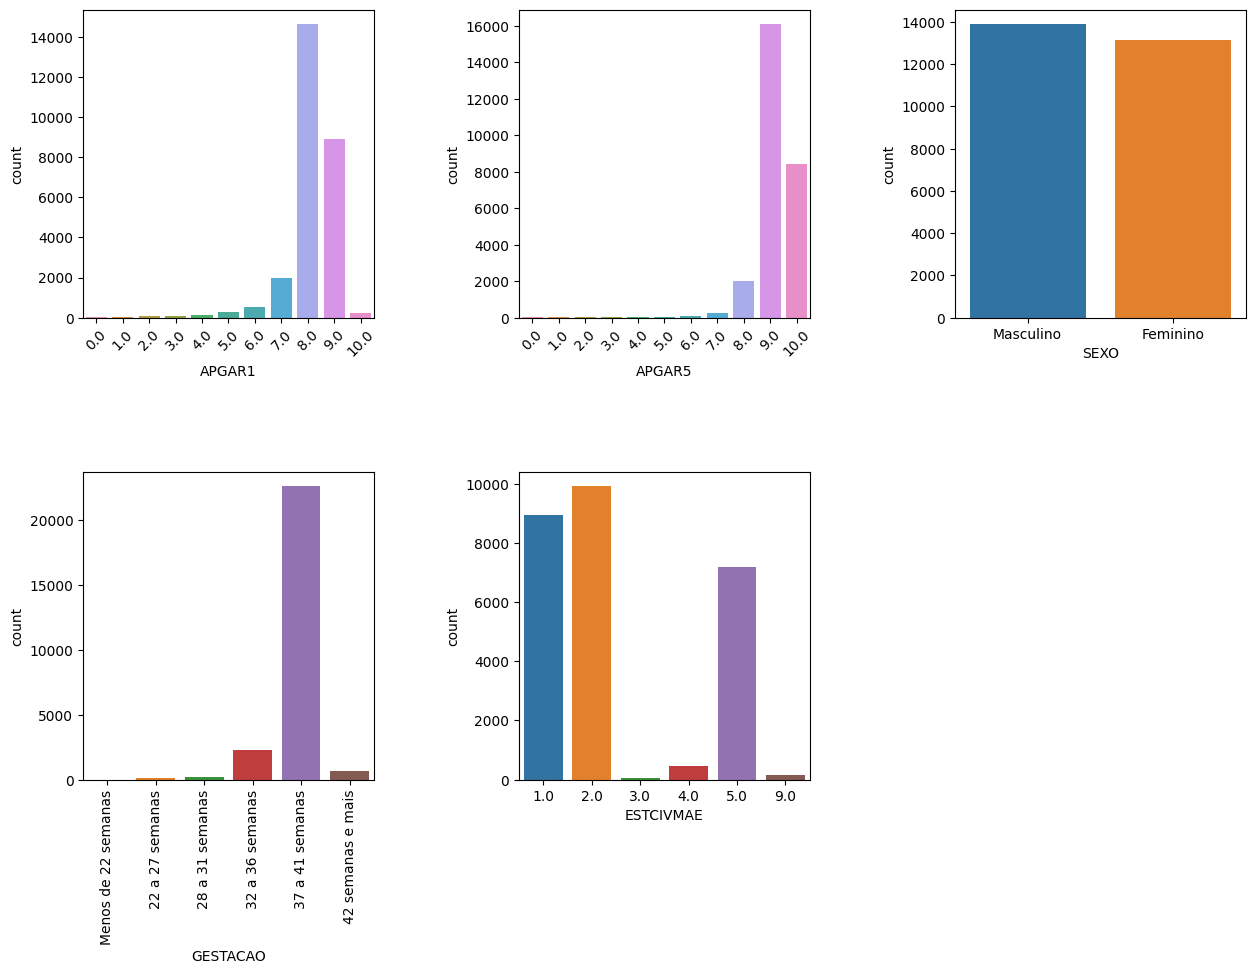

In [4]:
# definir tamanho da figura
plt.rc('figure', figsize=(15, 10))

# definir quantidade de linhas e colunas da subfigura
fig, axes = plt.subplots(2, 3)

# Definir ordem desejada
order_desejada = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas',
                  '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

# definir conteúdo de cada subfigura
sns.countplot(df, ax = axes[0, 0], x='APGAR1')
sns.countplot(df, ax = axes[0, 1], x='APGAR5')
sns.countplot(df, ax = axes[0, 2], x='SEXO')
sns.countplot(df, ax = axes[1, 0], x='GESTACAO', order=order_desejada)
sns.countplot(df, ax = axes[1, 1], x='ESTCIVMAE')

# Remover a subfigura na posição (1, 2)
fig.delaxes(axes[1, 2])

# Ajustar rotação e espaçamento
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,1].tick_params(axis='x', labelrotation=45)
axes[1,0].tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# exibir figura
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

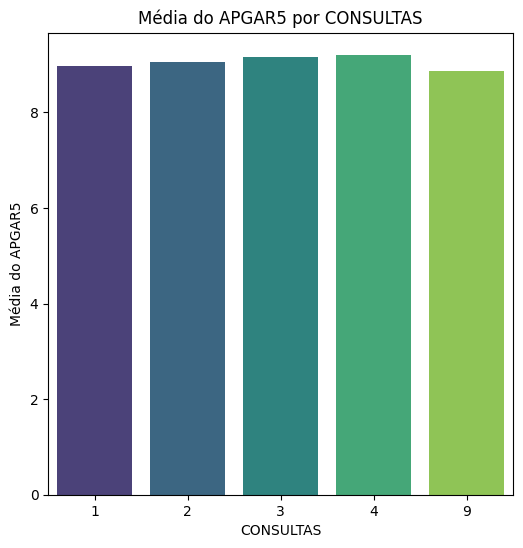

In [11]:
# Calcular a média do APGAR5 por CONSULTAS
media_apgar5_por_consulta = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=media_apgar5_por_consulta, palette='viridis')
plt.title('Média do APGAR5 por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('Média do APGAR5')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

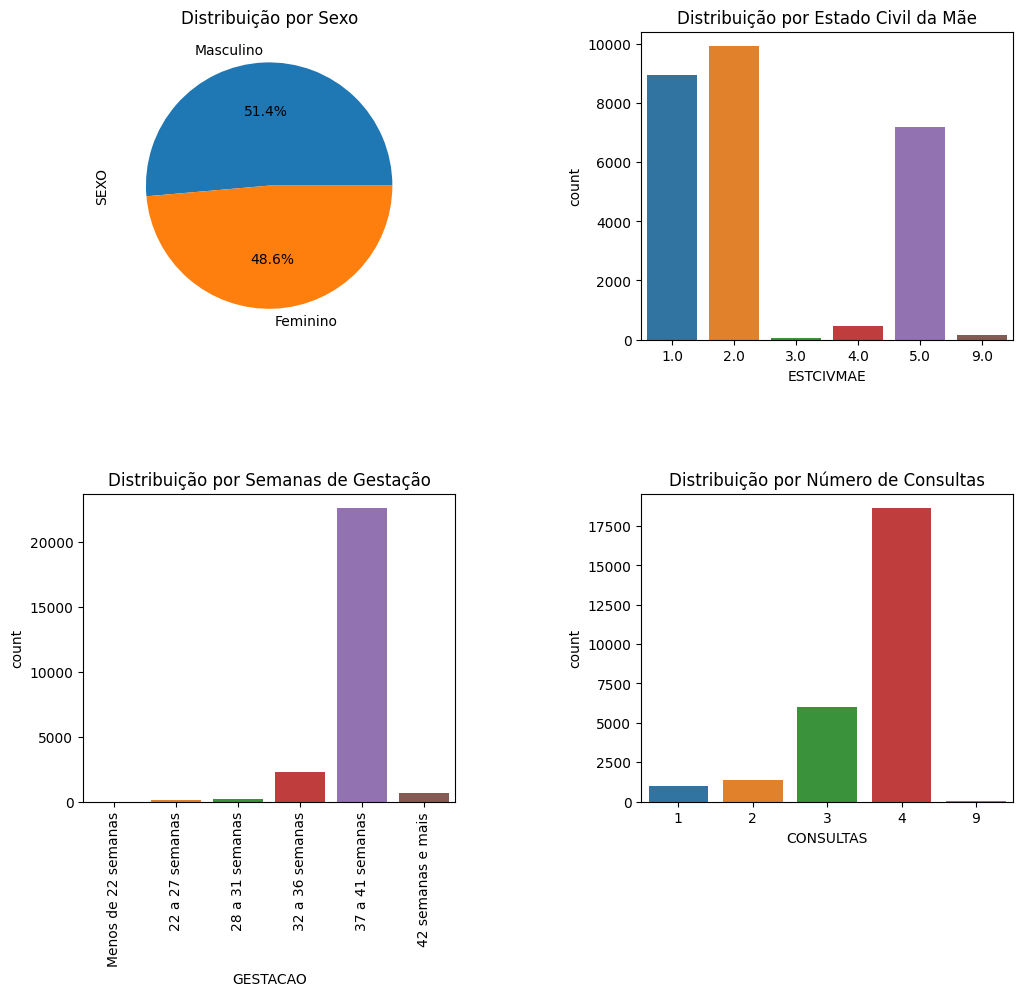

In [17]:
# definir tamanho da figura
plt.rc('figure', figsize=(12, 10))

# definir quantidade de linhas e colunas da subfigura
fig, axes = plt.subplots(2, 2)

# Definir ordem desejada
order_desejada = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas',
                  '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

# definir conteúdo de cada subfigura
df['SEXO'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%')
axes[0, 0].set_title('Distribuição por Sexo')

sns.countplot(df, ax = axes[0, 1], x='ESTCIVMAE')
axes[0, 1].set_title('Distribuição por Estado Civil da Mãe')

sns.countplot(df, ax = axes[1, 0], x='GESTACAO', order=order_desejada)
axes[1, 0].set_title('Distribuição por Semanas de Gestação')

sns.countplot(df, ax = axes[1, 1], x='CONSULTAS')
axes[1, 1].set_title('Distribuição por Número de Consultas')

# Ajustar rotação e espaçamento
axes[1,0].tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# exibir figura
plt.show()